<a href="https://colab.research.google.com/github/Tejasglitch/Netflix_Chronlogical_Data_Analysis/blob/main/TeamAAKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [33]:
print(f"Dataset shape: {netflix_data.shape}")

Dataset shape: (8807, 12)


In [34]:
netflix_data.dropna(inplace=True)

In [35]:
# Number of NaN values
netflix_data.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [36]:
missing_values = netflix_data.isna().sum()
missing_values_pct = (missing_values * 100 / netflix_data.shape[0]).round(2)
missing_table = pd.DataFrame({
    'Column': netflix_data.columns,
    'Missing_value_count' : missing_values.values,
    'Missing_value_pct (%)' : missing_values_pct.values
})
missing_table = missing_table.sort_values(by="Missing_value_pct (%)", ascending=False).reset_index(drop=True)
missing_table

,Column,Missing_value_count,Missing_value_pct (%)
0,show_id,0,0.0
1,type,0,0.0
2,title,0,0.0
3,director,0,0.0
4,cast,0,0.0
5,country,0,0.0
6,date_added,0,0.0
7,release_year,0,0.0
8,rating,0,0.0
9,duration,0,0.0


In [37]:
# Only one column has a numeric type
netflix_data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5332.0,2012.742123,9.625831,1942.0,2011.0,2016.0,2018.0,2021.0


In [38]:
netflix_data['title'].value_counts()

,count
title,
Zubaan,1
Sankofa,1
The Great British Baking Show,1
The Starling,1
Yoga Hosers,1
...,...
Birth of the Dragon,1
Paranoia,1
Dark Skies,1


In [39]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [40]:
# DataFrame divided by 'Movies' and 'TV-Shows'
netflix_data_movies = netflix_data.query("type == 'Movie'")
netflix_data_shows = netflix_data.query("type == 'TV Show'")

print(f"Movies: {len(netflix_data_movies)}")
print(f"TV-Shows: {len(netflix_data_shows)}")

Movies: 5185
TV-Shows: 147


In [41]:
import unicodedata
netflix_data['genre_list'] = netflix_data['listed_in'].str.split(', ')
netflix_data_genre = netflix_data.explode('genre_list')
netflix_data_genre['genre_list'] = netflix_data_genre['genre_list'].str.strip()

def clean_whitespace(s):
    s = unicodedata.normalize('NFKC', str(s))
    s = s.strip()
    s = ' '.join(s.split())
    return s

netflix_data_genre['genre_list'] = netflix_data_genre['genre_list'].map(clean_whitespace)
netflix_data_genre['genre_list'].value_counts()

,count
genre_list,
International Movies,2369
Dramas,2293
Comedies,1553
Action & Adventure,806
Independent Movies,740
Romantic Movies,579
Thrillers,547
Children & Family Movies,503
Documentaries,391


In [42]:
# Get all productions by each year and sort
all_productions = netflix_data["release_year"].value_counts().sort_index()
all_productions = pd.DataFrame(all_productions).rename(columns={"count": "Number_all"})

In [43]:
 #Count only movies by year
all_movies = netflix_data_movies.groupby("release_year")[["show_id"]].count().rename(columns={"show_id": "Number_movie"})

In [44]:
# Count only tv-shows by year
all_shows = netflix_data_shows.groupby("release_year")[["show_id"]].count().rename(columns={"show_id": "Number_show"})

In [45]:
# Join-Left Movies and TV-Shows to all_productions DF
all_productions = all_productions.join(all_movies, how="left", on="release_year")
all_productions = all_productions.join(all_shows, how="left", on="release_year")

# Filling NaN with the value 0 means that there was no movie or TV show in the given year
all_productions.fillna(0, inplace=True)
all_productions = all_productions.astype(np.int32)

all_productions.head()

,Number_all,Number_movie,Number_show
release_year,,,
1942,1,1,0
1944,1,1,0
1945,1,1,0
1946,1,1,0
1947,1,1,0


In [46]:
# First released movie on Netflix
netflix_data.query("release_year == 1925")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre_list


In [47]:
# The year with the highest number of productions/movies/tv-shows
all_year = all_productions.iloc[all_productions["Number_all"].argmax()].name
movie_year = all_productions.iloc[all_productions["Number_movie"].argmax()].name
show_year = all_productions.iloc[all_productions["Number_show"].argmax()].name

# A values of the highest number of productions/movies/tv-shows
all_number = all_productions.iloc[all_productions["Number_all"].argmax()]["Number_all"]
movie_number = all_productions.iloc[all_productions["Number_movie"].argmax()]["Number_movie"]
show_number = all_productions.iloc[all_productions["Number_show"].argmax()]["Number_show"]

In [48]:
print(f"All      -> {all_year} - {all_number}")
print("-"*23)
print(f"Movies   -> {movie_year} - {movie_number}")
print("-"*23)
print(f"TV-Shows -> {show_year} - {show_number}")


All      -> 2017 - 657
-----------------------
Movies   -> 2017 - 640
-----------------------
TV-Shows -> 2020 - 33


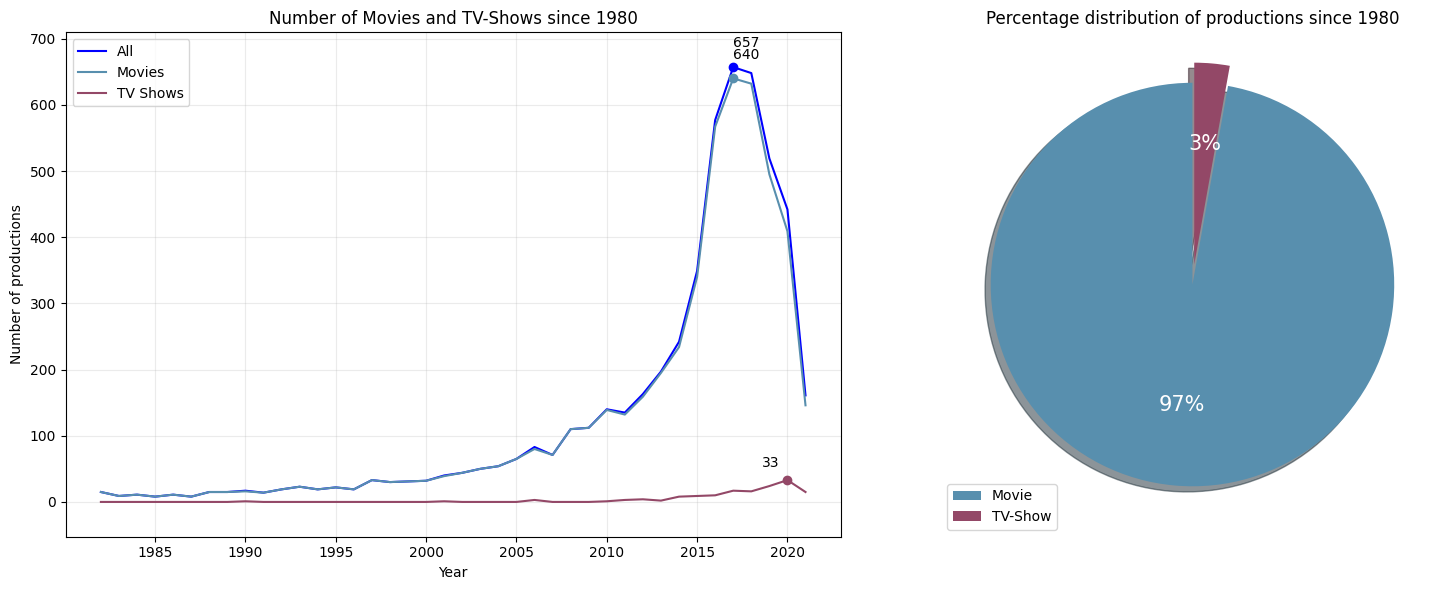

In [49]:
FIGURE_SIZE = (16,6)
since = 32
movie_color = "#588FAE"
show_color = "#934867"

fig, ax = plt.subplots(1, 2, figsize=FIGURE_SIZE)

ax[0].plot(all_productions["Number_all"][since:], color="blue")
ax[0].plot(all_productions["Number_movie"][since:], color=movie_color)
ax[0].plot(all_productions["Number_show"][since:], color=show_color)

ax[0].plot(all_year, all_number, color="blue", marker="o")
ax[0].plot(movie_year, movie_number, color=movie_color, marker="o")
ax[0].plot(show_year, show_number, color=show_color, marker="o")

ax[0].text(all_year, all_number + 30, all_number)
ax[0].text(movie_year, movie_number + 30, movie_number)
ax[0].text(show_year - 1.4, show_number + 20, show_number)

ax[0].set_title("Number of Movies and TV-Shows since 1980")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of productions")
ax[0].legend(["All", "Movies", "TV Shows"])
ax[0].margins(y=0.08)
ax[0].grid(True, alpha=.25)

ax[1].pie([all_productions["Number_movie"][since:].sum(), all_productions["Number_show"][since:].sum()],
           explode=(0,0.1), startangle=90, shadow=True, autopct='%.0f%%', colors=[movie_color, show_color], textprops={'color':"white",
                                                                                                                       'fontsize': 15})
ax[1].set_title("Percentage distribution of productions since 1980")
ax[1].legend(["Movie", "TV-Show"], loc="lower left")


plt.tight_layout()
plt.show()

In [50]:

# Get rows without 'Empty' cells
netflix_data_duration =netflix_data.query("duration != 'Empty'")

# Split value in cell to get only number of season or movie length in minutes
time = netflix_data_duration.query("type == 'Movie'").copy()
season = netflix_data_duration.query("type == 'TV Show'").copy()

time["Time"] = time['duration'].map(lambda x: x.split()[0]).astype(np.int32)
season["Season"] = season['duration'].map(lambda x: x.split()[0] if x.split()[0].isdigit() else 0).astype(np.int32)

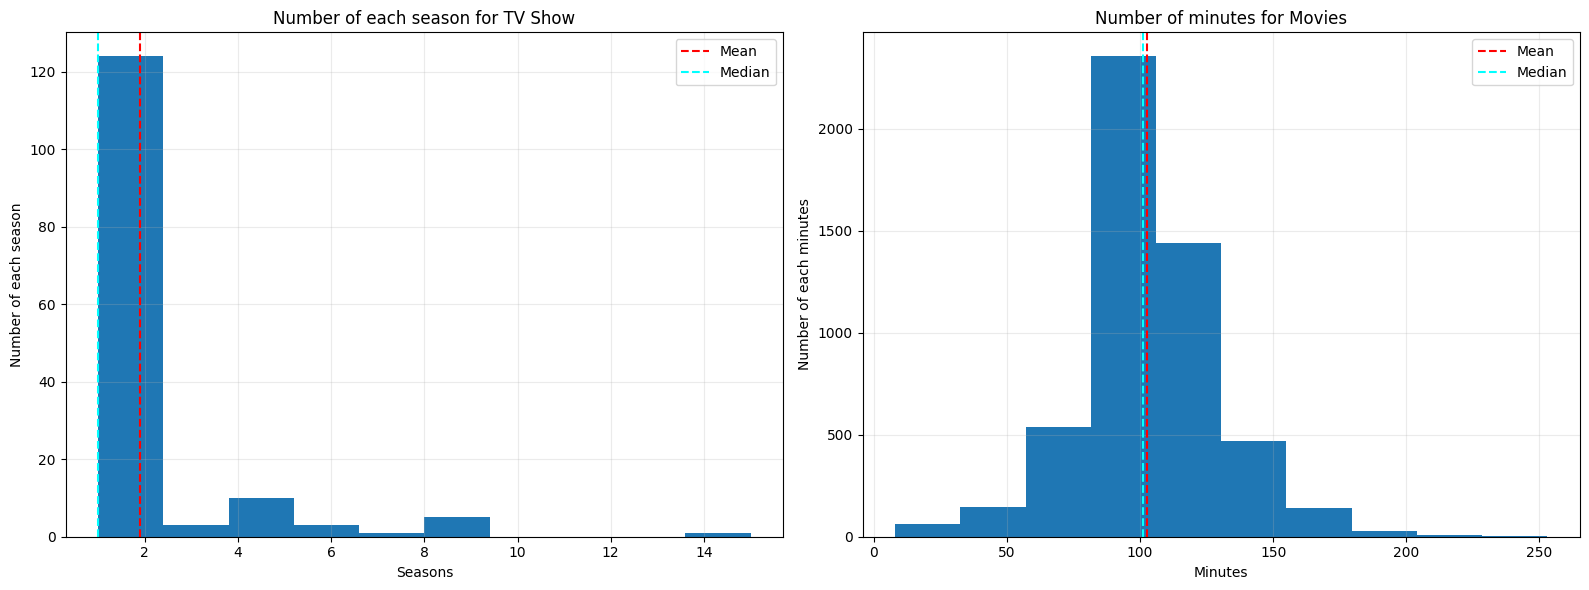

In [51]:
fig, ax = plt.subplots(1, 2, figsize=FIGURE_SIZE)

ax[0].hist(season["Season"])
ax[0].axvline(season["Season"].mean(), color="red", linestyle="--", label="Mean")
ax[0].axvline(season["Season"].median(),color="cyan", linestyle="--", label="Median")
ax[0].set_title("Number of each season for TV Show")
ax[0].set_xlabel("Seasons")
ax[0].set_ylabel("Number of each season")
ax[0].grid(True, alpha=.25)
ax[0].legend()

ax[1].hist(time["Time"])
ax[1].axvline(time["Time"].mean(), color="red", linestyle="--", label="Mean")
ax[1].axvline(time["Time"].median(),color="cyan", linestyle="--", label="Median")
ax[1].set_title("Number of minutes for Movies")
ax[1].set_xlabel("Minutes")
ax[1].set_ylabel("Number of each minutes")
ax[1].grid(True, alpha=.25)
ax[1].legend()

plt.tight_layout()
plt.show()

In [52]:
time_grouped = time.groupby("release_year")[["Time"]].agg(["sum", "count"])
time_grouped.columns = time_grouped.columns.droplevel()

season_grouped = season.groupby("release_year")[["Season"]].agg(["sum", "count"])
season_grouped.columns = season_grouped.columns.droplevel()

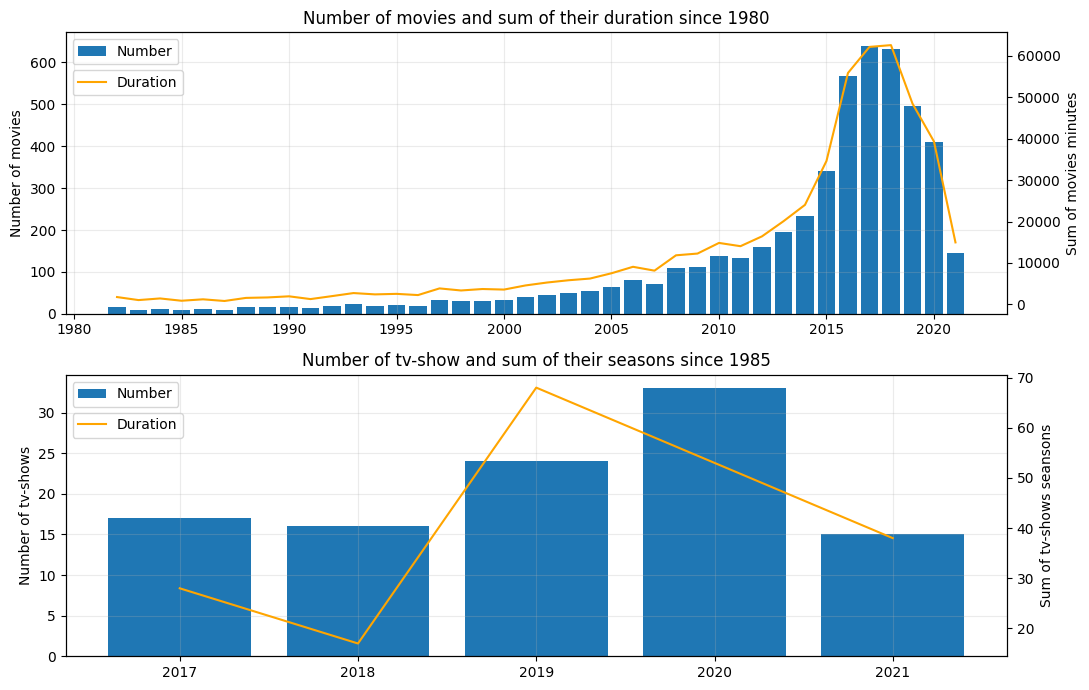

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(11, 7))
since = 32

time_grouped_since = time_grouped[since:]
ax[0].bar(time_grouped_since.index, time_grouped_since["count"], label="Number")
ax[0].grid(True, alpha=.25)
ax[0].set_title("Number of movies and sum of their duration since 1980")
ax[0].set_ylabel("Number of movies")

ax2 = ax[0].twinx()
ax2.plot(time_grouped_since.index, time_grouped_since["sum"], color="orange", label="Duration")
ax2.set_ylabel("Sum of movies minutes")

ax[0].legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, .89))

######

season_grouped_since = season_grouped[10:]
ax[1].bar(season_grouped_since.index, season_grouped_since["count"], label="Number")
ax[1].grid(True, alpha=.25)
ax[1].set_title("Number of tv-show and sum of their seasons since 1985")
ax[1].set_ylabel("Number of tv-shows")

ax4 = ax[1].twinx()
ax4.plot(season_grouped_since.index, season_grouped_since["sum"], color="orange", label="Duration")
ax4.set_ylabel("Sum of tv-shows seansons")

ax[1].legend(loc='upper left')
ax4.legend(loc='upper left', bbox_to_anchor=(0, .89))

plt.tight_layout()
plt.show()

In [54]:
import plotly.express as px

netflix_data_directors = netflix_data[netflix_data['director'] != "Unknown"]

# Count directors and get top 15
director_counts = netflix_data_directors['director'].value_counts().reset_index()
director_counts.columns = ['director', 'count']
top_directors = director_counts.head(15)

# Plot
fig_director = px.bar(top_directors, x='director', y='count', title='Top 15 Directors by Number of Titles (Excluding Unknown)')
fig_director.update_layout(xaxis_title='Director', yaxis_title='Number of Titles', xaxis_tickangle=-45)
fig_director.show()